<h1>Project Python for Data-Science</h1>
<h2>Alexandre LEVRET</h2>

In [1]:
# Import the libraries

In [3]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 1/ Data-préparation (pandas)

In [4]:
file_train = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn"
names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', 'Class']
df_train = pd.read_csv(file_train, sep = "\s+", names = names, index_col = False)
df_train = df_train[['1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band', 'Class']]
df_train.head()

,1st spectral band,2nd spectral band,3rd spectral band,4th spectral band,Class
0,92,112,118,85,3
1,84,103,104,81,3
2,84,99,104,78,3
3,84,99,104,81,3
4,76,99,104,81,3


## 2/ Data-visualisation (matplotlib)

In [5]:
import matplotlib.pyplot as plt

In [6]:
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, 4].values

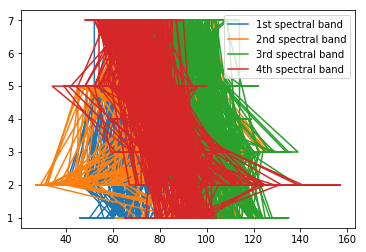

In [7]:
plt.plot(X_train, y_train)
plt.legend(['1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band'])
plt.show()

## 3/ Modélisation (scikit learn)

In [8]:
# Import test file

In [9]:
file_test = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst"
names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', 'Class']
df_test = pd.read_csv(file_test, sep = "\s+", names = names, index_col = False)
df_test = df_test[['1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band', 'Class']]
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, 4].values
df_test.head()

,1st spectral band,2nd spectral band,3rd spectral band,4th spectral band,Class
0,76,103,118,88,3
1,80,107,118,88,3
2,80,95,100,78,4
3,80,95,100,78,4
4,80,91,100,78,4


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
performances = {}
algo = RandomForestClassifier()
modele = algo.fit(X_train, y_train)
for i in range(8):
    modele      = algo.fit(X_train, y_train)
    performance = modele.score(X_test, y_test)
    print(i, performance)
    performances[i] = [performance]

0 0.821
1 0.822
2 0.8155
3 0.8215
4 0.8235
5 0.821
6 0.822
7 0.8265


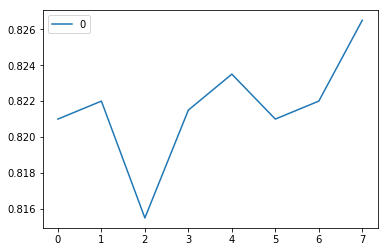

In [12]:
pd.DataFrame.from_dict(performances).T.plot()

In [13]:
classifier = RandomForestClassifier(n_estimators = 20)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[447   1   8   1   4   0]
 [  0 213   0   1   8   2]
 [  8   0 346  33   0  10]
 [  0   0  54  74   2  81]
 [ 10  16   4   1 177  29]
 [  0   3  18  54  15 380]]
             precision    recall  f1-score   support

          1       0.96      0.97      0.97       461
          2       0.91      0.95      0.93       224
          3       0.80      0.87      0.84       397
          4       0.45      0.35      0.39       211
          5       0.86      0.75      0.80       237
          7       0.76      0.81      0.78       470

avg / total       0.81      0.82      0.81      2000

0.8185


# 4/ Optimisation des hyperparamètres (grid search)

In [15]:
from sklearn.grid_search import GridSearchCV

/Users/Alexandre/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Alexandre/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [16]:
param_grid = {"max_depth": [1, None],
              "bootstrap": [True, False]}
grid = GridSearchCV(algo, param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_.score(X_test, y_test))

0.8042841037204058 0.8235


In [30]:
y_pred = algo.predict_proba(X_test)